In [1]:
#import libraries
import pandas as pd
import numpy as np

In [2]:
data_preprocessed=pd.read_csv('Absenteeism_preprocessed.csv')

In [3]:
data_preprocessed.head(5)

,Reason_1,Reason_2,Reason_3,Reason_4,Month Value,Day of the week,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,0,0,0,1,7,1,289,36,33,239.554,30,0,2,1,4
1,0,0,0,0,7,1,118,13,50,239.554,31,0,1,0,0
2,0,0,0,1,7,2,179,51,38,239.554,31,0,0,0,2
3,1,0,0,0,7,3,279,5,39,239.554,24,0,2,0,4
4,0,0,0,1,7,3,289,36,33,239.554,30,0,2,1,2


## Create the targets

In [5]:
data_preprocessed['Absenteeism Time in Hours'].median()

3.0

### median is 3, so class moderately absent can be considered for the target variable with values <=3 and Excessively absent for values >=4

In [7]:
targets=np.where(data_preprocessed['Absenteeism Time in Hours']>data_preprocessed['Absenteeism Time in Hours'].median(),1,0)

In [8]:
data_preprocessed['Excessive Absenteeism']=targets

In [9]:
data_preprocessed.head(3)

,Reason_1,Reason_2,Reason_3,Reason_4,Month Value,Day of the week,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Excessive Absenteeism
0,0,0,0,1,7,1,289,36,33,239.554,30,0,2,1,4,1
1,0,0,0,0,7,1,118,13,50,239.554,31,0,1,0,0,0
2,0,0,0,1,7,2,179,51,38,239.554,31,0,0,0,2,0


In [11]:
targets.sum() /targets.shape[0]

0.45571428571428574

class 1 is 45% of data and class 0 is 55% , this is sufficiently at a good balanced condition

In [12]:
data_with_targets=data_preprocessed.drop(['Absenteeism Time in Hours'],axis=1)

In [13]:
data_with_targets is data_preprocessed

False

In [14]:
data_with_targets

,Reason_1,Reason_2,Reason_3,Reason_4,Month Value,Day of the week,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Excessive Absenteeism
0,0,0,0,1,7,1,289,36,33,239.554,30,0,2,1,1
1,0,0,0,0,7,1,118,13,50,239.554,31,0,1,0,0
2,0,0,0,1,7,2,179,51,38,239.554,31,0,0,0,0
3,1,0,0,0,7,3,279,5,39,239.554,24,0,2,0,1
4,0,0,0,1,7,3,289,36,33,239.554,30,0,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,1,0,0,0,5,2,179,22,40,237.656,22,1,2,0,1
696,1,0,0,0,5,2,225,26,28,237.656,24,0,1,2,0
697,1,0,0,0,5,3,330,16,28,237.656,25,1,0,0,1
698,0,0,0,1,5,3,235,16,32,237.656,25,1,0,0,0


### Select the inputs for the regression

In [15]:
data_with_targets.shape

(700, 15)

In [16]:
data_with_targets.iloc[:,:14]

,Reason_1,Reason_2,Reason_3,Reason_4,Month Value,Day of the week,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets
0,0,0,0,1,7,1,289,36,33,239.554,30,0,2,1
1,0,0,0,0,7,1,118,13,50,239.554,31,0,1,0
2,0,0,0,1,7,2,179,51,38,239.554,31,0,0,0
3,1,0,0,0,7,3,279,5,39,239.554,24,0,2,0
4,0,0,0,1,7,3,289,36,33,239.554,30,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,1,0,0,0,5,2,179,22,40,237.656,22,1,2,0
696,1,0,0,0,5,2,225,26,28,237.656,24,0,1,2
697,1,0,0,0,5,3,330,16,28,237.656,25,1,0,0
698,0,0,0,1,5,3,235,16,32,237.656,25,1,0,0


In [17]:
data_with_targets.iloc[:,:-1]

,Reason_1,Reason_2,Reason_3,Reason_4,Month Value,Day of the week,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets
0,0,0,0,1,7,1,289,36,33,239.554,30,0,2,1
1,0,0,0,0,7,1,118,13,50,239.554,31,0,1,0
2,0,0,0,1,7,2,179,51,38,239.554,31,0,0,0
3,1,0,0,0,7,3,279,5,39,239.554,24,0,2,0
4,0,0,0,1,7,3,289,36,33,239.554,30,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,1,0,0,0,5,2,179,22,40,237.656,22,1,2,0
696,1,0,0,0,5,2,225,26,28,237.656,24,0,1,2
697,1,0,0,0,5,3,330,16,28,237.656,25,1,0,0
698,0,0,0,1,5,3,235,16,32,237.656,25,1,0,0


In [103]:
unscaled_inputs=data_with_targets.iloc[:,:-1]

### Standardize the data

In [19]:
from sklearn.preprocessing import StandardScaler   # subtract mean and divide by stddev
scaler=StandardScaler()

In [20]:
scaler.fit(unscaled_inputs)

StandardScaler()

In [21]:
scaled_inputs=scaler.transform(unscaled_inputs)

In [22]:
scaled_inputs

array([[-0.57735027, -0.09298136, -0.31448545, ..., -0.44798003,
         0.88046927,  0.26848661],
       [-0.57735027, -0.09298136, -0.31448545, ..., -0.44798003,
        -0.01928035, -0.58968976],
       [-0.57735027, -0.09298136, -0.31448545, ..., -0.44798003,
        -0.91902997, -0.58968976],
       ...,
       [ 1.73205081, -0.09298136, -0.31448545, ...,  2.23224237,
        -0.91902997, -0.58968976],
       [-0.57735027, -0.09298136, -0.31448545, ...,  2.23224237,
        -0.91902997, -0.58968976],
       [-0.57735027, -0.09298136, -0.31448545, ..., -0.44798003,
        -0.01928035,  0.26848661]])

In [23]:
scaled_inputs.shape

(700, 14)

### Split the data intro train and test and shuffle

In [24]:
from sklearn.model_selection import train_test_split

In [32]:
X_train,X_test,y_train,y_test=train_test_split(scaled_inputs,targets,train_size=0.8,random_state=20)

In [33]:
print(X_train.shape,y_train.shape)

(560, 14) (560,)


In [34]:
print(X_test.shape,y_test.shape)

(140, 14) (140,)


## Logistic Regression model

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

## Training the model

In [36]:
Log_reg=LogisticRegression()

In [37]:
Log_reg.fit(X_train,y_train)

LogisticRegression()

In [38]:
Log_reg.score(X_train,y_train)

0.7839285714285714

### Accuracy check-manual

In [40]:
model_output=Log_reg.predict(X_train)

In [41]:
model_output==y_train

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True, False, False,  True,  True,  True,  True,
       False,  True, False,  True, False, False,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False, False, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True, False,  True, False,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
       False,  True, False,  True,  True, False, False, False,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,

In [43]:
np.sum(model_output==y_train)

439

In [45]:
model_output.shape

(560,)

In [47]:
np.sum(model_output==y_train)/model_output.shape[0]

0.7839285714285714

### Finding the intercept and coefficients

In [48]:
Log_reg.intercept_

array([-0.22206736])

In [49]:
Log_reg.coef_

array([[ 2.07601767,  0.33504757,  1.56162303,  1.32927434,  0.18793677,
        -0.07062253,  0.70639316, -0.03986811, -0.20089491, -0.00456366,
         0.31933564, -0.135508  ,  0.38172443, -0.3332426 ]])

In [50]:
unscaled_inputs.columns.values

array(['Reason_1', 'Reason_2', 'Reason_3', 'Reason_4', 'Month Value',
       'Day of the week', 'Transportation Expense', 'Distance to Work',
       'Age', 'Daily Work Load Average', 'Body Mass Index', 'Education',
       'Children', 'Pets'], dtype=object)

In [51]:
feature_names=unscaled_inputs.columns.values

In [52]:
summary_table=pd.DataFrame(columns=['feature_names'],data=feature_names)

In [53]:
summary_table['coefficient']=np.transpose(Log_reg.coef_)

In [54]:
summary_table

,feature_names,coefficient
0,Reason_1,2.076018
1,Reason_2,0.335048
2,Reason_3,1.561623
3,Reason_4,1.329274
4,Month Value,0.187937
5,Day of the week,-0.070623
6,Transportation Expense,0.706393
7,Distance to Work,-0.039868
8,Age,-0.200895
9,Daily Work Load Average,-0.004564


In [55]:
summary_table.index=summary_table.index+1

In [56]:
summary_table.loc[0]=['Intercept',Log_reg.intercept_[0]]
summary_table=summary_table.sort_index()
summary_table

,feature_names,coefficient
0,Intercept,-0.222067
1,Reason_1,2.076018
2,Reason_2,0.335048
3,Reason_3,1.561623
4,Reason_4,1.329274
5,Month Value,0.187937
6,Day of the week,-0.070623
7,Transportation Expense,0.706393
8,Distance to Work,-0.039868
9,Age,-0.200895


### Interpreting the coefficients

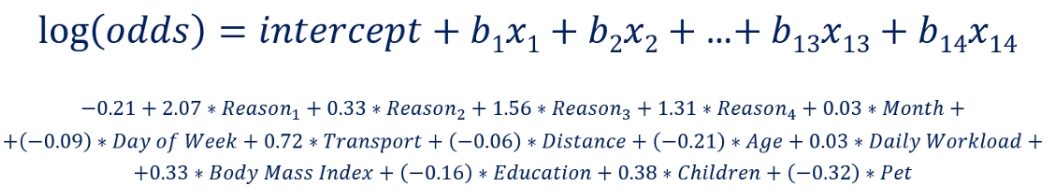

In [58]:
summary_table['odds_ratio']=np.exp(summary_table.coefficient)

In [60]:
summary_table.sort_values('odds_ratio',ascending=False)

,feature_names,coefficient,odds_ratio
1,Reason_1,2.076018,7.972656
3,Reason_3,1.561623,4.766551
4,Reason_4,1.329274,3.778301
7,Transportation Expense,0.706393,2.026668
13,Children,0.381724,1.464808
2,Reason_2,0.335048,1.398007
11,Body Mass Index,0.319336,1.376213
5,Month Value,0.187937,1.206757
10,Daily Work Load Average,-0.004564,0.995447
8,Distance to Work,-0.039868,0.960916


#### If coefficient values is nearly 0 then that feature has no importance to the model, as in the model it gets multiplied by 0, similary if coeffiecient is then for a unit change in the feature value there is no change, it remains same.

####  Daily workload average => 0.028, Distance to work=> -0.06, Days of the week -0.08

## ** since the dummy variables are standardized, interpretability is difficult ex: if the reason given is Reason_1 then it would be interpreted as it is 7.928 times more likely that the person will be excessively absent

## Create Custom Scaler

In [124]:
from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')



# create the Custom Scaler class

class CustomScaler(BaseEstimator,TransformerMixin): 
    
    # init or what information we need to declare a CustomScaler object
    # and what is calculated/declared as we do
    
    def __init__(self,columns,copy=True,with_mean=True,with_std=True):
        
        # scaler is nothing but a Standard Scaler object
        self.scaler = StandardScaler(copy,with_mean,with_std)
        # with some columns 'twist'
        self.columns = columns
        self.mean_ = None
        self.var_ = None
        
    
    # the fit method, which, again based on StandardScale
    
    def fit(self, X, y=None):
        self.scaler.fit(X[self.columns], y)
        self.mean_ = np.mean(X[self.columns])
        self.var_ = np.var(X[self.columns])
        return self
    
    # the transform method which does the actual scaling

    def transform(self, X, y=None, copy=None):
        
        # record the initial order of the columns
        init_col_order = X.columns
        
        # scale all features that you chose when creating the instance of the class
        X_scaled = pd.DataFrame(self.scaler.transform(X[self.columns]), columns=self.columns)
        
        # declare a variable containing all information that was not scaled
        X_not_scaled = X.loc[:,~X.columns.isin(self.columns)]
        
        # return a data frame which contains all scaled features and all 'not scaled' features
        # use the original order (that you recorded in the beginning)
        return pd.concat([X_not_scaled, X_scaled], axis=1)[init_col_order]

In [130]:

# select the columns to omit
columns_to_omit = ['Reason_1', 'Reason_2', 'Reason_3', 'Reason_4','Education']
columns_to_scale = [x for x in unscaled_inputs.columns.values if x not in columns_to_omit]
# prepare scaler
absenteeism_scaler = CustomScaler(columns_to_scale)
absenteeism_scaler.fit(unscaled_inputs) # add standardizetion info, mean and SD for data set
# transform data
scaled_inputs = absenteeism_scaler.transform(unscaled_inputs) # subtract mean and devide by SD
scaled_inputs.shape

(700, 14)

In [131]:
x_train, x_test, y_train, y_test = train_test_split(scaled_inputs, targets, train_size=0.8, random_state=20) 
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)
reg = LogisticRegression()
reg.fit(x_train, y_train)
reg.score(x_train, y_train)

(560, 14) (140, 14) (560,) (140,)


0.775

In [133]:
feature_name = unscaled_inputs.columns.values
summary_table = pd.DataFrame(columns=['Feature name'], data = feature_name)
summary_table['Coefficient'] = np.transpose(reg.coef_) # traspose, as nd arrays are rows, but not columns
summary_table

,Feature name,Coefficient
0,Reason_1,2.800965
1,Reason_2,0.934858
2,Reason_3,3.095616
3,Reason_4,0.856587
4,Month Value,0.166248
5,Day of the week,-0.084370
6,Transportation Expense,0.612733
7,Distance to Work,-0.007797
8,Age,-0.165923
9,Daily Work Load Average,-0.000147


In [134]:

summary_table['Odds_ratio'] = np.exp(summary_table.Coefficient) #  'Odds ratio'shows the odds ratio of each feature
summary_table.sort_values('Odds_ratio', ascending=False)

,Feature name,Coefficient,Odds_ratio
2,Reason_3,3.095616,22.100858
0,Reason_1,2.800965,16.460523
1,Reason_2,0.934858,2.546851
3,Reason_4,0.856587,2.355110
6,Transportation Expense,0.612733,1.845467
12,Children,0.361990,1.436184
10,Body Mass Index,0.271811,1.312340
4,Month Value,0.166248,1.180866
9,Daily Work Load Average,-0.000147,0.999853
7,Distance to Work,-0.007797,0.992233


Daily Work load Average, Distance to work , Day of the week are having coefficient nearly zero, hence can be eliminated

coefficients with p-value>0.05 can be eliminated

In [135]:

reg.score(x_test,y_test)

0.7428571428571429

In [136]:

predicted_proba = reg.predict_proba(x_test) # probabilities
predicted_proba

array([[0.73838887, 0.26161113],
       [0.60860095, 0.39139905],
       [0.40910176, 0.59089824],
       [0.80489361, 0.19510639],
       [0.0732329 , 0.9267671 ],
       [0.31965834, 0.68034166],
       [0.31302205, 0.68697795],
       [0.13341719, 0.86658281],
       [0.79712508, 0.20287492],
       [0.75274419, 0.24725581],
       [0.48222467, 0.51777533],
       [0.1964133 , 0.8035867 ],
       [0.07857533, 0.92142467],
       [0.70622367, 0.29377633],
       [0.30708515, 0.69291485],
       [0.57055326, 0.42944674],
       [0.54143955, 0.45856045],
       [0.57205946, 0.42794054],
       [0.38194051, 0.61805949],
       [0.04857923, 0.95142077],
       [0.6977753 , 0.3022247 ],
       [0.79578125, 0.20421875],
       [0.3949288 , 0.6050712 ],
       [0.42248618, 0.57751382],
       [0.26634773, 0.73365227],
       [0.75608758, 0.24391242],
       [0.51088279, 0.48911721],
       [0.86807166, 0.13192834],
       [0.20221381, 0.79778619],
       [0.78635626, 0.21364374],
       [0.

In [137]:

# select ONLY the probabilities referring to 1s
predicted_proba[:,1]

array([0.26161113, 0.39139905, 0.59089824, 0.19510639, 0.9267671 ,
       0.68034166, 0.68697795, 0.86658281, 0.20287492, 0.24725581,
       0.51777533, 0.8035867 , 0.92142467, 0.29377633, 0.69291485,
       0.42944674, 0.45856045, 0.42794054, 0.61805949, 0.95142077,
       0.3022247 , 0.20421875, 0.6050712 , 0.57751382, 0.73365227,
       0.24391242, 0.48911721, 0.13192834, 0.79778619, 0.21364374,
       0.37354833, 0.68671888, 0.68840326, 0.54141425, 0.20421875,
       0.50817528, 0.21068631, 0.74426986, 0.43687316, 0.59038329,
       0.22501874, 0.43474443, 0.21701898, 0.39313905, 0.8143125 ,
       0.57069356, 0.69250264, 0.27274934, 0.20204647, 0.18057868,
       0.59237372, 0.34581089, 0.66771423, 0.28542145, 0.84957431,
       0.47045028, 0.88919506, 0.25614793, 0.31973858, 0.31768456,
       0.72178349, 0.6571659 , 0.31198576, 0.78711296, 0.19846624,
       0.26534346, 0.08192232, 0.23025544, 0.7270172 , 0.33464876,
       0.21066287, 0.29448939, 0.90909748, 0.43911695, 0.61982

In [138]:
import pickle
# pickle the model file
with open('model', 'wb') as file:
    pickle.dump(reg, file)
# pickle the scaler file
with open('scaler','wb') as file:
    pickle.dump(absenteeism_scaler, file)